<img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº1
#### Alumno: Mauro Fernández

# 1. Consigna

Programar una función que genere señales senoidales y que permita parametrizar:

* la amplitud máxima de la senoidal (volts)
* su valor medio (volts)
* la frecuencia (Hz)
* la fase (radianes)
* la cantidad de muestras digitalizada por el ADC (# muestras)
* la frecuencia de muestreo del ADC.

La función debería admitir ser llamada de la siguiente manera:<br/><br/>
<center><code>tt, xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)</code></center>

**Bonus**: Implementar alguna otra señal propia de un generador de señales. 

# 2. Resolución
En la siguiente sección se implementan los generadores de señales solicitados.
## 2.1. Generador de señales senoidales

In [142]:
import numpy as np

def mi_funcion_sen(vmax, dc, ff, ph, nn, fs):
    """Generador de señales senoidales parametrizable
    
    Es importante que fs >= 2*ff por teorema de muestreo.

    Args:
        vmax (float):   amplitud máxima de la senoidal (volts)
        dc (float):     valor medio (volts)
        ff (float):     frecuencia (Hz)
        ph (float):     fase (radianes)
        nn (int):       cantidad de muestras digitalizada por el ADC (# muestras)
        fs (float):     frecuencia de muestreo del ADC

    Returns:
        tt (float[nn]): Base de tiempos de la señal generada
        xx (float[nn]): Valores de amplitud de la señal generada
    """
    # Calculamos el tiempo de muestreo
    ts = 1/fs
    
    # Calculamos la frecuencia angular
    w0 = 2*np.pi*ff
    
    # Generamos la base de tiempos
    tt = np.linspace(0, (nn-1)*ts, num=nn).flatten()
    
    # Generamos la amplitud de la señal para cada instante en la base de tiempos
    xx = vmax * np.sin(w0*tt+ph) + dc

    # Retornamos espacio de tiempos y señal
    return tt, xx

## 2.2. Bonus: Generador de señales cuadradas

In [143]:
import numpy as np

def mi_funcion_square(vmax, dc, ff, ph, nn, fs):
    """Generador de señales cuadradas parametrizable
    
    Es importante que fs >= 2*ff por teorema de muestreo.
    El duty es fijo en 50%
    
    Args:
        vmax (float):   amplitud máxima de la senoidal (volts)
        dc (float):     valor medio (volts)
        ff (float):     frecuencia (Hz)
        ph (float):     fase (radianes)
        nn (int):       cantidad de muestras digitalizada por el ADC (# muestras)
        fs (float):     frecuencia de muestreo del ADC

    Returns:
        tt (float[nn]): Base de tiempos de la señal generada
        xx (float[nn]): Valores de amplitud de la señal generada
    """
    # Utilizamos señal senoidal como la forma base
    tt, xx = mi_funcion_sen(1, 0, ff, ph, nn, fs)
    
    xx[xx>=0] =  vmax + dc
    xx[xx<0]  = -vmax + dc
    
    # Retornamos espacio de tiempos y señal
    return tt, xx

# 3. Implementación
En la siguiente sección se generan diversas señales con diferentes configuraciones para verificar el correcto funcionamiento de la función implementada.
## 3.1. Inicialización de gráficos

In [144]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (8,5)

# Configuración del tamaño de fuente
fig_font_size = 14
plt.rcParams.update({'font.size':fig_font_size})

## 3.2. Señal senoidal 1 - Generación y graficación

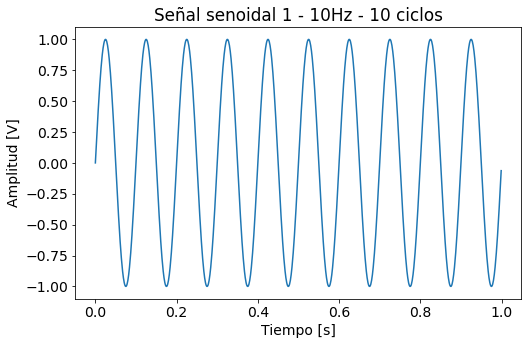

In [145]:
# Señal 1: Amplitud = 1V, Valor Medio = 0V, Frec = 10Hz, Fase = 0 rad, N° muestras ADC = 100*10, Frec. muestreo ADC = 1000Hz
tt, xx = mi_funcion_sen(vmax = 1, dc = 0, ff = 10, ph=0, nn = 100*10, fs = 1000)

# Graficación de señal
plt.plot(tt, xx)
plt.title('Señal senoidal 1 - 10Hz - 10 ciclos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.show()

## 3.3. Señal senoidal 2 - Generación y graficación

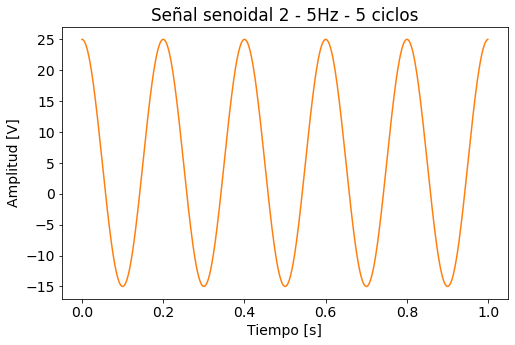

In [146]:
# Señal 2: Amplitud = 20V, Valor Medio = 5V, Frec = 5Hz, Fase = pi/2 rad, N° muestras ADC = 200*5, Frec. muestreo ADC = 1000Hz
tt, xx = mi_funcion_sen(vmax = 20, dc = 5, ff = 5, ph=np.pi/2, nn = 200*5, fs = 1000)

# Graficación de señal
plt.plot(tt, xx, 'tab:orange')
plt.title('Señal senoidal 2 - 5Hz - 5 ciclos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.show()

## 3.4. Señal cuadrada 1 - Generación y graficación

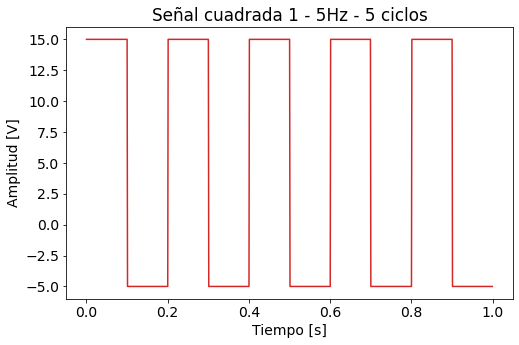

In [147]:
# Señal 3: Amplitud = 10V, Valor Medio = 5V, Frec = 5Hz, Fase = 0 rad, N° muestras ADC = 200*5, Frec. muestreo ADC = 1000Hz
tt, xx = mi_funcion_square(vmax = 10, dc = 5, ff = 5, ph=0, nn = 200*5, fs = 1000)

# Graficación de señal
plt.plot(tt, xx, 'tab:red')
plt.title('Señal cuadrada 1 - 5Hz - 5 ciclos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.show()